In [29]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

import decoupler as dc

In [26]:
path_counts = "/cellar/users/aklie/data/datasets/Hangauer2017_BT474_RNA-seq/results/quant/featureCounts/hangauer.results.counts"
path_out = '/cellar/users/aklie/data/datasets/Hangauer2017_BT474_RNA-seq/results/analysis'

# Load data

In [3]:
# Load counts_df
counts_df = pd.read_csv(path_counts, comment="#", sep="\t", index_col=0)
gene_info = counts_df.iloc[:, 0:5]
counts_df = counts_df.iloc[:, 5:]
counts_df.columns = [x.split("/")[-1].split(".")[0] for x in counts_df.columns]
counts_df = counts_df.T
counts_df.head()

Geneid,ENSG00000223972.4,ENSG00000227232.4,ENSG00000243485.2,ENSG00000237613.2,ENSG00000268020.2,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.2,ENSG00000239945.1,ENSG00000233750.3,...,ENSG00000198886.2,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
BT474_Parental_rep_1,1,48,0,0,0,0,0,1,0,0,...,1355812,576,639,1430,561158,157493,3,838528,1197,3294
BT474_Parental_rep_2,0,58,0,0,0,0,0,0,0,1,...,1307008,596,681,1501,547499,146954,2,805678,1157,3193
BT474_Persister_rep_1,2,121,0,0,0,0,0,1,0,3,...,1458749,430,535,1447,1038861,318349,2,1165281,728,5219
BT474_Persister_rep_2,0,114,0,0,0,0,0,0,0,5,...,1634297,483,486,1283,1246788,364061,0,1231642,706,5372
BT474_Persister_rep_3,1,151,0,0,0,0,0,0,0,11,...,1489987,529,576,1439,1024129,319921,2,1115148,665,4907


In [4]:
# Create metadata with condition
metadata = pd.DataFrame(index=counts_df.index)
metadata["condition"] = metadata.index.str.split("_").str[1]

In [5]:
samples_to_keep = ~metadata.condition.isna().values
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

In [6]:
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

In [10]:
inference = DefaultInference(n_cpus=8)

In [11]:
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
)

In [12]:
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 65.18 seconds.

Fitting dispersion trend curve...
... done in 0.76 seconds.

/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/pydeseq2/dds.py:425: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 53.82 seconds.

Fitting LFCs...
... done in 4.90 seconds.

Refitting 0 outliers.



In [14]:
stat_res = DeseqStats(dds, inference=inference, contrast=["condition", "Persister", "Parental"])

In [15]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition Persister vs Parental
                       baseMean  log2FoldChange     lfcSE       stat  \
Geneid                                                                 
ENSG00000227232.4  9.650603e+01        1.159739  0.246804   4.699021   
ENSG00000233750.3  3.867951e+00        3.542448  1.643472   2.155466   
ENSG00000237683.5  1.457389e+02        1.017381  0.159591   6.374942   
ENSG00000241860.2  7.257619e+01        1.042201  0.250116   4.166867   
ENSG00000237094.7  2.019704e+02        0.284362  0.146837   1.936587   
...                         ...             ...       ...        ...   
ENSG00000198786.2  8.649288e+05        0.865267  0.063253  13.679529   
ENSG00000198695.2  2.556210e+05        1.008199  0.043686  23.078218   
ENSG00000198727.2  1.017254e+06        0.385904  0.051784   7.452215   
ENSG00000210195.2  8.951918e+02       -0.873521  0.073217 -11.930545   
ENSG00000210196.2  4.329575e+03        0.547863  0.051963  10.5432

... done in 2.10 seconds.



In [45]:
res = stat_res.results_df

In [46]:
res["ensembl_gene_id"] = res.index.str.split(".").str[0]

In [47]:
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res["ensembl_gene_id"].map(mapper.mapper) 
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,ensembl_gene_id
Geneid,,,,,,,,
ENSG00000227232.4,9.650603e+01,1.159739,0.246804,4.699021,2.614115e-06,7.085989e-06,WASH7P,ENSG00000227232
ENSG00000233750.3,3.867951e+00,3.542448,1.643472,2.155466,3.112542e-02,5.394413e-02,CICP27,ENSG00000233750
ENSG00000237683.5,1.457389e+02,1.017381,0.159591,6.374942,1.830324e-10,6.190640e-10,NaN,ENSG00000237683
ENSG00000241860.2,7.257619e+01,1.042201,0.250116,4.166867,3.088146e-05,7.756630e-05,AL627309.5,ENSG00000241860
ENSG00000237094.7,2.019704e+02,0.284362,0.146837,1.936587,5.279580e-02,8.698018e-02,NaN,ENSG00000237094
...,...,...,...,...,...,...,...,...
ENSG00000198786.2,8.649288e+05,0.865267,0.063253,13.679529,1.345611e-42,1.094564e-41,MT-ND5,ENSG00000198786
ENSG00000198695.2,2.556210e+05,1.008199,0.043686,23.078218,7.663178e-118,1.609892e-116,MT-ND6,ENSG00000198695
ENSG00000198727.2,1.017254e+06,0.385904,0.051784,7.452215,9.178607e-14,3.547276e-13,MT-CYB,ENSG00000198727


In [48]:
res = res[res.baseMean >= 10]
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,ensembl_gene_id
Geneid,,,,,,,,
ENSG00000227232.4,9.650603e+01,1.159739,0.246804,4.699021,2.614115e-06,7.085989e-06,WASH7P,ENSG00000227232
ENSG00000237683.5,1.457389e+02,1.017381,0.159591,6.374942,1.830324e-10,6.190640e-10,NaN,ENSG00000237683
ENSG00000241860.2,7.257619e+01,1.042201,0.250116,4.166867,3.088146e-05,7.756630e-05,AL627309.5,ENSG00000241860
ENSG00000237094.7,2.019704e+02,0.284362,0.146837,1.936587,5.279580e-02,8.698018e-02,NaN,ENSG00000237094
ENSG00000225972.1,1.210480e+02,-0.917733,0.172489,-5.320534,1.034629e-07,3.059729e-07,MTND1P23,ENSG00000225972
...,...,...,...,...,...,...,...,...
ENSG00000198786.2,8.649288e+05,0.865267,0.063253,13.679529,1.345611e-42,1.094564e-41,MT-ND5,ENSG00000198786
ENSG00000198695.2,2.556210e+05,1.008199,0.043686,23.078218,7.663178e-118,1.609892e-116,MT-ND6,ENSG00000198695
ENSG00000198727.2,1.017254e+06,0.385904,0.051784,7.452215,9.178607e-14,3.547276e-13,MT-CYB,ENSG00000198727


In [49]:
res.to_csv(f"{path_out}/deseq2_results.csv")

In [50]:
sigs = res[(res.padj < 0.001) & (abs(res.log2FoldChange) > 2)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,ensembl_gene_id
Geneid,,,,,,,,
ENSG00000215912.7,64.591347,2.246237,0.290986,7.719393,1.168850e-14,4.680685e-14,TTC34,ENSG00000215912
ENSG00000238260.1,61.733376,2.672628,0.285417,9.363956,7.680618e-21,3.777004e-20,AL513320.1,ENSG00000238260
ENSG00000097021.15,2263.308838,-2.302809,0.070522,-32.653881,7.058530e-234,3.373334e-232,ACOT7,ENSG00000097021
ENSG00000270171.1,14.341893,3.868689,0.953618,4.056855,4.973804e-05,1.226572e-04,AL359881.3,ENSG00000270171
ENSG00000269978.1,16.176580,2.163907,0.589515,3.670654,2.419310e-04,5.618096e-04,AL359881.1,ENSG00000269978
...,...,...,...,...,...,...,...,...
ENSG00000237863.2,51.849243,4.145247,0.530580,7.812666,5.599079e-15,2.276911e-14,IRS4-AS1,ENSG00000237863
ENSG00000203952.5,72.421921,-4.288267,0.333722,-12.849829,8.620061e-38,6.410195e-37,CCDC160,ENSG00000203952
ENSG00000134595.6,25.685902,3.467219,0.611605,5.669055,1.435877e-08,4.444380e-08,SOX3,ENSG00000134595


In [51]:
import scanpy as sc

/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


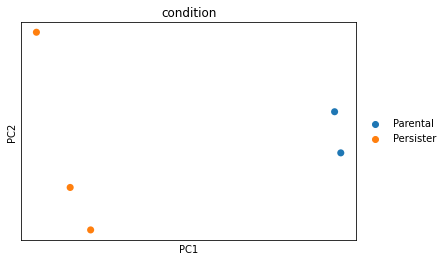

In [52]:
sc.tl.pca(dds)
sc.pl.pca(dds, color = 'condition', size = 200)

In [53]:
dds

AnnData object with n_obs × n_vars = 5 × 28900
    obs: 'condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

# Viz

In [36]:
res["Geneid"] = res.index
res = res.set_index("Symbol")

/tmp/ipykernel_664148/3264297959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["Geneid"] = res.index


/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


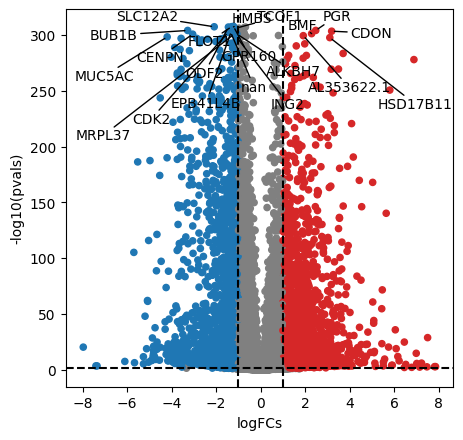

In [38]:
dc.plot_volcano_df(
    res,
    x='log2FoldChange',
    y='padj',
    top=20,
    figsize=(5, 5),
    sign_thr=0.05,
    lFCs_thr=1,
)

In [55]:
import numpy as np

In [56]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [57]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 5 × 1525
    obs: 'condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [58]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

In [60]:
import seaborn as sns

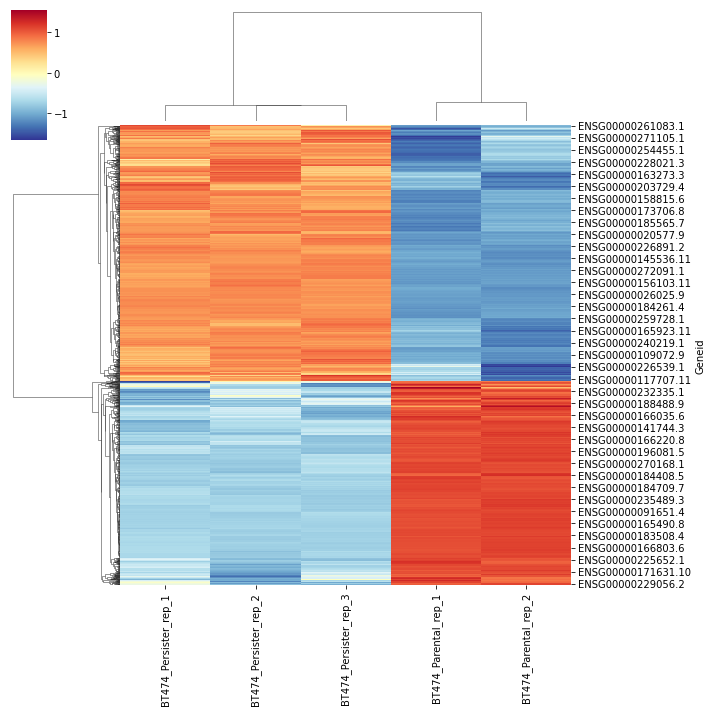

In [61]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')